<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/12th_lec_tabulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandasを使ってデータをハンドリングしてみよう

Pandasライブラリを使うと，さまざまなデータの操作をスムーズに柔軟に実施することができます．

Pandasでは，データの塊を「シリーズ(Series)オブジェクト」や「データフレーム (DataFrame) オブジェクト」といった型で扱います．また，このようなオブジェクト効率的に高速に扱うための機能が用意されています．

*   Seriesオブジェクトは時系列データのよう1次元のデータを主に扱います
*   Dataframeオブジェクトは表のように2次元になっているデータを収納するものです

公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/

### Pandasライブラリの読み込み

In [42]:
import pandas as pd

### Seriesオブジェクト

左の列はIndex, 右の列がデータを示しています

In [43]:
# Series
sample_pandas_series = pd.Series([0,0,1,1,2,2,3,3,4,4])
print(sample_pandas_series )

0    0
1    0
2    1
3    1
4    2
5    2
6    3
7    3
8    4
9    4
dtype: int64


pd.Seriesオブジェクトの値とインデックスは，「pd.Seriesオブジェクト名.values」「pd.Seriesオブジェクト名.index」でそれぞれ参照できます．

In [44]:
print("データの値:",sample_pandas_series.values)
print("インデックスの値:",sample_pandas_series.index)

データの値: [0 0 1 1 2 2 3 3 4 4]
インデックスの値: RangeIndex(start=0, stop=10, step=1)


もし，インデックスを数字ではなく，何か特定の文字などに置き換えたい場合は，以下のように記述します．

In [45]:
# indexを文字にする
sample_pandas_series = pd.Series([0,0,1,1,2,2,3,3,4,4]
                                     ,index=['a','b','c','d','e','f','g','h','i','j'])
print(sample_pandas_series)

a    0
b    0
c    1
d    1
e    2
f    2
g    3
h    3
i    4
j    4
dtype: int64


### DataFrameオブジェクト

DataFrameはいくつもの列で異なる型を持たせることが可能です．Excelのまとめシートのようなものを想像してください．

淀屋橋
北浜
天満橋
京橋
野江
関目
森小路
千林




In [46]:
data1 = {'ID':['KH01','KH02','KH03','KH04','KH05','KH06', 'KH07']
        ,'name':['Yodoyabashi','Kitahama','Tenmabashi','Kyobashi','Noe', 'Sekime', 'Morishoji']
        ,'ltd_exp':[True,True,True,True,False,False,False]
        ,'exp':[True,True,True,True,False,False,False]
        ,'year':['1963','1963','1910','1932','1910', '1931', '1931']}

#pandas(pd)のデータフレームとしてdata_frame1を作成する
data_frame1 = pd.DataFrame(data1)

print(data_frame1)

     ID         name  ltd_exp    exp  year
0  KH01  Yodoyabashi     True   True  1963
1  KH02     Kitahama     True   True  1963
2  KH03   Tenmabashi     True   True  1910
3  KH04     Kyobashi     True   True  1932
4  KH05          Noe    False  False  1910
5  KH06       Sekime    False  False  1931
6  KH07    Morishoji    False  False  1931


In [47]:
# 転置（行と列を入れ替える）をするときは後ろに「.T」をつける
data_frame1.T

,0,1,2,3,4,5,6
ID,KH01,KH02,KH03,KH04,KH05,KH06,KH07
name,Yodoyabashi,Kitahama,Tenmabashi,Kyobashi,Noe,Sekime,Morishoji
ltd_exp,True,True,True,True,False,False,False
exp,True,True,True,True,False,False,False
year,1963,1963,1910,1932,1910,1931,1931


In [48]:
#特定の列だけ抜き出すこともできる
data_frame1[["ID","year"]]

,ID,year
0,KH01,1963
1,KH02,1963
2,KH03,1910
3,KH04,1932
4,KH05,1910
5,KH06,1931
6,KH07,1931


複数のデータフレームを結合することもできます．様々な結合に仕方があるので，ご自身で調べてみてください．

ここでは'ID'をキーに駅名データと乗降客のデータをまとめます（マージします）．

In [49]:
# 別のデータの準備
data2 = {'ID':['KH01','KH02','KH03','KH04','KH05','KH06', 'KH07']
        ,'passengers':[96566,29421,48027,157302,10837,12625,8636]}
data_frame2 = pd.DataFrame(data2)
data_frame2

,ID,passengers
0,KH01,96566
1,KH02,29421
2,KH03,48027
3,KH04,157302
4,KH05,10837
5,KH06,12625
6,KH07,8636


In [50]:
# データのマージ（内部結合）
merged_data_frame = pd.merge(data_frame1,data_frame2)
merged_data_frame

,ID,name,ltd_exp,exp,year,passengers
0,KH01,Yodoyabashi,True,True,1963,96566
1,KH02,Kitahama,True,True,1963,29421
2,KH03,Tenmabashi,True,True,1910,48027
3,KH04,Kyobashi,True,True,1932,157302
4,KH05,Noe,False,False,1910,10837
5,KH06,Sekime,False,False,1931,12625
6,KH07,Morishoji,False,False,1931,8636


特定の項目をキーにデータのソートもできます

In [51]:
merged_data_frame.sort_values('year')

,ID,name,ltd_exp,exp,year,passengers
2,KH03,Tenmabashi,True,True,1910,48027
4,KH05,Noe,False,False,1910,10837
5,KH06,Sekime,False,False,1931,12625
6,KH07,Morishoji,False,False,1931,8636
3,KH04,Kyobashi,True,True,1932,157302
0,KH01,Yodoyabashi,True,True,1963,96566
1,KH02,Kitahama,True,True,1963,29421


In [52]:
#乗降客数で並べると京橋が圧倒的に多い
merged_data_frame.sort_values('passengers', ascending=False)

,ID,name,ltd_exp,exp,year,passengers
3,KH04,Kyobashi,True,True,1932,157302
0,KH01,Yodoyabashi,True,True,1963,96566
2,KH03,Tenmabashi,True,True,1910,48027
1,KH02,Kitahama,True,True,1963,29421
5,KH06,Sekime,False,False,1931,12625
4,KH05,Noe,False,False,1910,10837
6,KH07,Morishoji,False,False,1931,8636


<Axes: xlabel='name'>

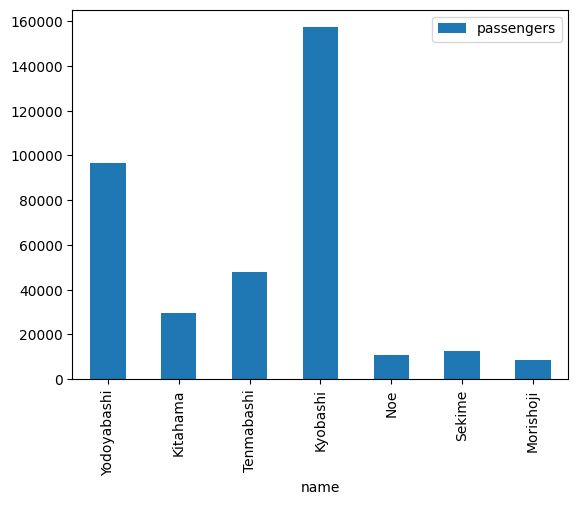

In [53]:
#pandasライブラリにもプロットをするためのメソッドがある(matplotlibを使わなくてもプロットできる)
merged_data_frame.plot.bar(x ='name',y=['passengers'])

pandasを使ってデータの集計もできます．
特急停車駅とそれ以外の乗降客の平均をgroupby()メソッドとmean()メソッドを使って調べます．
特急停車駅のほうがかなり乗降客が多いことがわかります．

In [54]:
# データのグループ集計
merged_data_frame.groupby("ltd_exp")["passengers"].mean()

ltd_exp
False    10699.333333
True     82829.000000
Name: passengers, dtype: float64

<Axes: xlabel='ltd_exp'>

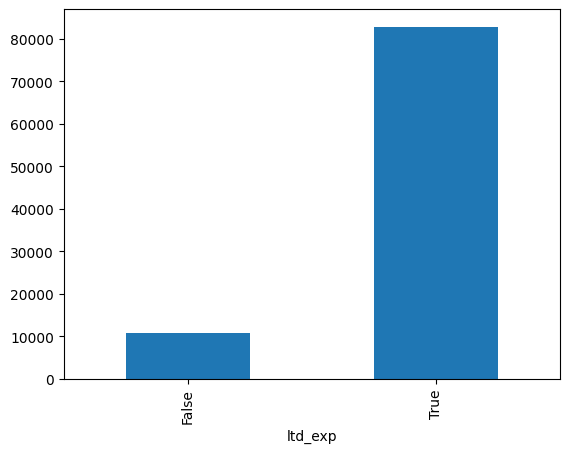

In [55]:
#もちろんプロットもできます
merged_data_frame.groupby("ltd_exp")["passengers"].mean().plot.bar(x ='ltd_exp',y=['passengers'])

## 大阪のひったくりを分析してみよう

大阪府警犯罪オープンデータサイト
https://www.police.pref.osaka.lg.jp/seikatsu/9290.html

ここから「ひったくり」の情報だけをダウンロードしてクロス集計する


In [60]:
# CSVファイルのURL
url = 'https://www.police.pref.osaka.lg.jp/material/files/group/2/osaka_2022hittakuri.csv'

# CSVファイルを読み込み、データフレームに変換
#「cp932」はShift_JISという文字コードの別名．これを指定しないと日本語が含まれている場合上手く読み込めない
df = pd.read_csv(url, encoding='cp932')

type(df) #pd.read_csv()で読み込んだデータの型はDataFrameになる

pandas.core.frame.DataFrame

In [61]:
# クロス集計を実行
cross_tab = pd.crosstab(index=df['被害者の年齢'], columns=df['被害者の性別'])
cross_tab

被害者の性別,女性,男性
被害者の年齢,,
10歳代,6,1
20歳代,19,17
30歳代,6,14
40歳代,3,17
50歳代,4,9
60-64歳,1,2
65-69歳,0,5
70歳以上,28,6


In [62]:
# 合計の表示
# margins=Trueにすると合計が表示される
cross_tab = pd.crosstab(index=df['被害者の年齢'], columns=df['被害者の性別'],
                        margins=True, margins_name='小計')
cross_tab

被害者の性別,女性,男性,小計
被害者の年齢,,,
10歳代,6,1,7
20歳代,19,17,36
30歳代,6,14,20
40歳代,3,17,20
50歳代,4,9,13
60-64歳,1,2,3
65-69歳,0,5,5
70歳以上,28,6,34
小計,67,71,138


In [63]:
# 少し複雑なクロス集計を実行
cross_tab = pd.crosstab(index=[df["被害者の年齢"],df["管轄警察署（発生地）"]], columns=df["被害者の性別"])
cross_tab


被害者の性別             女性  男性
被害者の年齢 管轄警察署（発生地）        
10歳代   中堺           0   1
       南            1   0
       天満           1   0
       守口           1   0
       東淀川          1   0
...                ..  ..
70歳以上  福島           2   0
       西成           4   0
       門真           1   1
       阿倍野          0   1
       高石           1   0

[80 rows x 2 columns]